In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.DataFrame()

In [61]:
x1 = [1,0,1,0]
x2 = [1,0,0,1]
yd = [0,0,1,1]
n = 0.25

In [62]:
df['x1'] = x1
df['x2'] = x2
df['Y'] = yd

In [63]:
def sigmoide(I):
    resultado = 1/(1+np.e**(-1*I))
    return resultado

In [64]:
def redondear(lista):
    for i in range(0,len(lista)):
        lista[i] = round(lista[i],4)
    return lista

In [65]:
w = [0.2785,0.9575,0.5469,0.9649]
v = [0.1576,0.9706,0,0]
error = []
epocas_list = []

df['w_inicial'] = w
df['v_inicial'] = v

In [66]:
for epocas in range(0,21):
    for t in range(0,len(x1)):
        I_11 = round(x1[t]*w[0] + x2[t]*w[1],4) 
        I_21 = round(x1[t]*w[2] + x2[t]*w[3],4)
        
        y_11 = round(sigmoide(I_11),4)
        y_21 = round(sigmoide(I_21),4)
        
        I_12 = round(y_11*v[0] + y_21*v[1],4)
        y_12 = round(sigmoide(I_12),4)
        
        S_12 = round(yd[t] - y_12,4)
        S_11 = round(v[0]*S_12,4)
        S_21 = round(v[1]*S_12,4)
        
        w[0] += n*S_11*y_11*(1-y_11)*x1[t]
        w[1] += n*S_11*y_11*(1-y_11)*x2[t]
        w[2] += n*S_21*y_21*(1-y_21)*x1[t]
        w[3] += n*S_21*y_21*(1-y_21)*x2[t]
        
        v[0] += n*S_12*y_12*(1-y_12)*y_11
        v[1] += n*S_12*y_12*(1-y_12)*y_21   
        
        redondear(w)
        redondear(v)
        
    error.append(S_12)
    epocas_list.append(epocas)

In [67]:
resultado = []
for t in range(0,len(x1)):
    I_11 = round(x1[t]*w[0] + x2[t]*w[1],4) 
    I_21 = round(x1[t]*w[2] + x2[t]*w[3],4)
        
    y_11 = round(sigmoide(I_11),4)
    y_21 = round(sigmoide(I_21),4)
        
    I_12 = round(y_11*v[0] + y_21*v[1],4)
    y_12 = round(sigmoide(I_12),4)
    
    resultado.append(y_12)

In [68]:
df['w_resultante'] = w
df['v_resultante']= v
df['y_resultado'] = resultado
df

,x1,x2,Y,w_inicial,v_inicial,w_resultante,v_resultante,y_resultado
0,1,1,0,0.2785,0.1576,0.2503,-0.1825,0.5877
1,0,0,0,0.9575,0.9706,0.9432,0.6246,0.5551
2,1,0,1,0.5469,0.0000,0.4841,0.0000,0.5705
3,0,1,1,0.9649,0.0000,0.8509,0.0000,0.5760


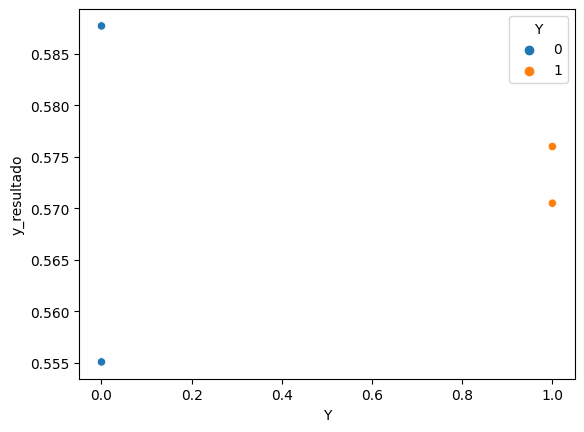

In [69]:
import seaborn as sns

sns.scatterplot(data = df, x = 'Y', y = 'y_resultado', hue = 'Y')
plt.show()


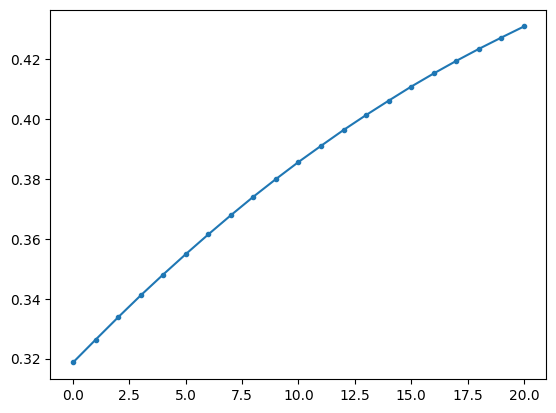

In [70]:
plt.plot(epocas_list,error,'.-')